## Introduction to Seaborn

In [ ]:
# Import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### Styling

In [27]:
sns.set_theme() # Apply the default theme

### Numerical Plots
* Distribution: Histogram, KDE (Kernel Density Estimate)
* Bar Plot
* Count Plot
* Facet Plot: Tạo ra 1 lưới 2D gồm các bảng được xác định bởi các biến tạo thành các hàng và cột 
* Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
* Join Plot
* Pair Plot
* Heat map: Một kỹ thuật trực quan hoá dữ liệu cho thấy cường độ của 1 hiện tượng là màu sắc ở 2 chiều

#### Distribution Plot
* Univariate distribution of observations


In [12]:
tip_df = sns.load_dataset("tips")

In [14]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


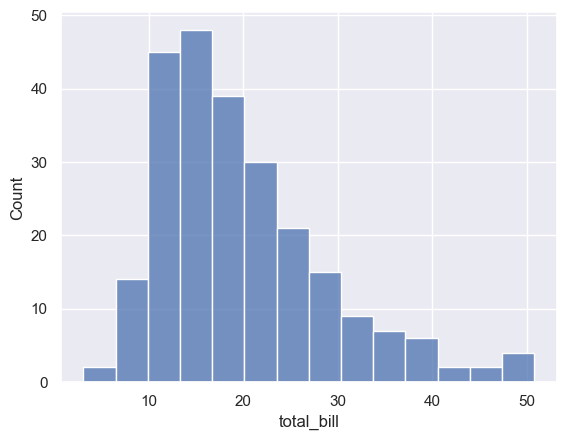

In [30]:
sns.histplot(data=tip_df['total_bill']);

In [ ]:
tip_df["total_bill"].value_counts().sort_values(ascending=False)
# 

total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

#### KDE Plot
* A kernel density estimate (KDE) plot is a method of for visualizing the distribution of observations in a dataset, analagous to a histogram.
* KDE represents the data using a continuous probability density curve (đường cong mật độ xác xuất) in one or more dimensions.

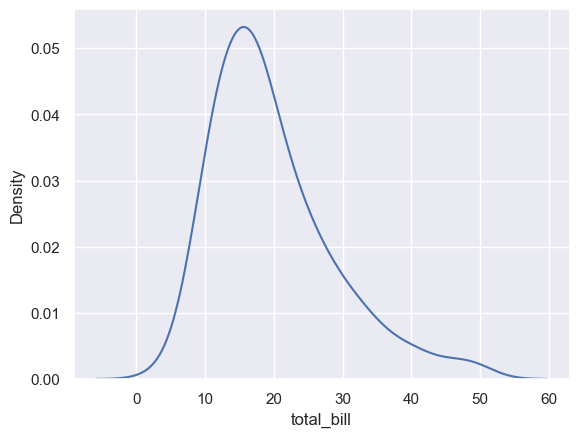

In [29]:
sns.kdeplot(data=tip_df['total_bill']);

#### Displot
* Informative distributional summaries
* Statistical analyses require knowledge about the distribution of variables in your dataset
* The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation.

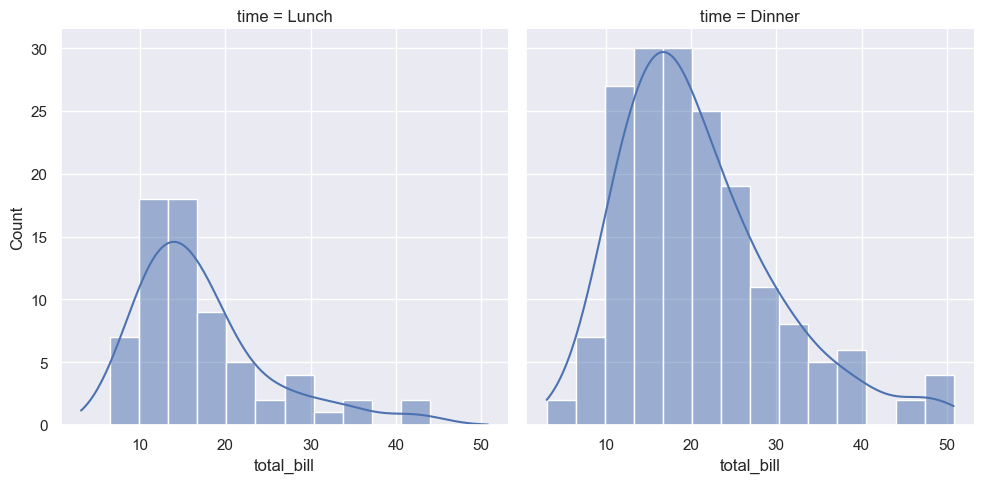

In [28]:
sns.displot(data=tip_df, x = "total_bill", kde=True,col="time")

### Bar Plot

In [31]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


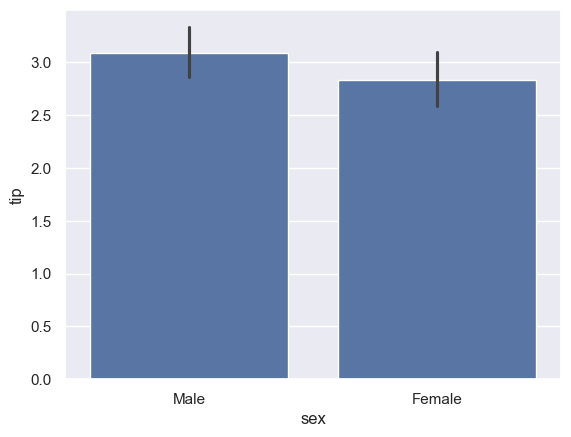

In [33]:
# Compare female tip with male tip
sns.barplot(data=tip_df, x="sex", y="tip", estimator=np.mean);

### Count Plot

In [35]:
tip_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

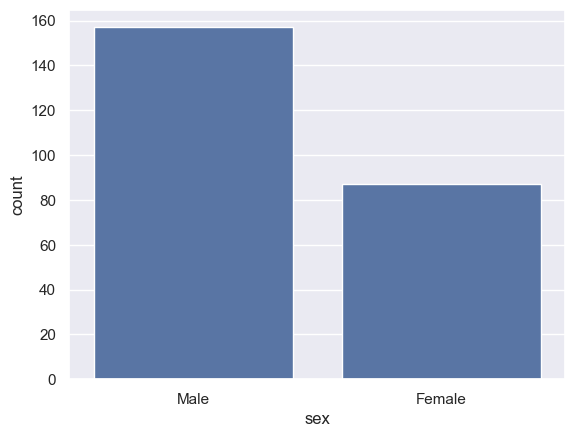

In [41]:
sns.countplot(data=tip_df,x="sex");

### Box Plot
Box Plot is a good indication of how the values in the data are spread out ("minimum", fist quartile (Q1), median, third quartile (Q3), and "maximum)
* Identify outliers (dữ liệu ngoại lai)
* Check if data is symmetrical (đối xứng)
* Determine how tightly data is grouped


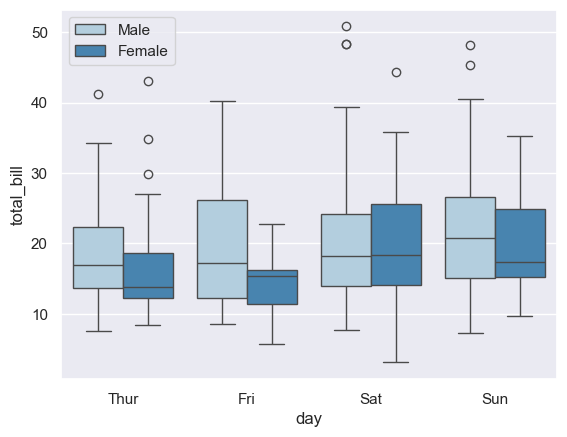

In [52]:
sns.boxplot(data=tip_df, x='day', y='total_bill',hue="sex", palette="Blues");
plt.legend(loc=0) # Delete tile of the legend


### Faced Grid
* FacetGrid can be drawn with up to three dimensions: `row`, `col`, and `hue`.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method.

In [54]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


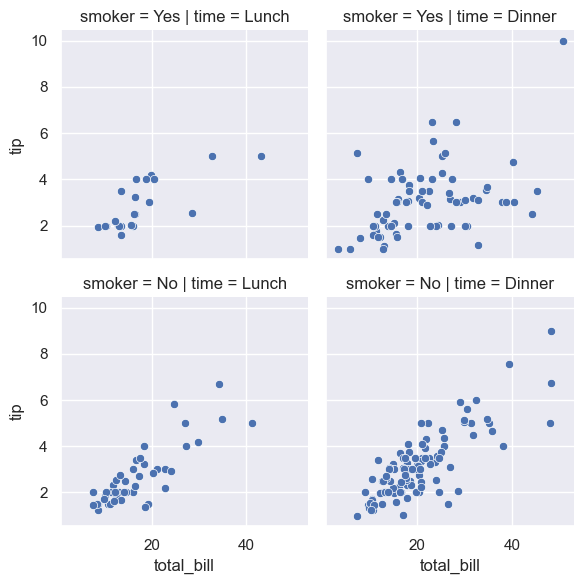

In [55]:
tip_fg = sns.FacetGrid(data=tip_df, row="smoker", col="time") # Create a class instance of Facet Grid class
tip_fg.map(sns.scatterplot, 'total_bill', 'tip');

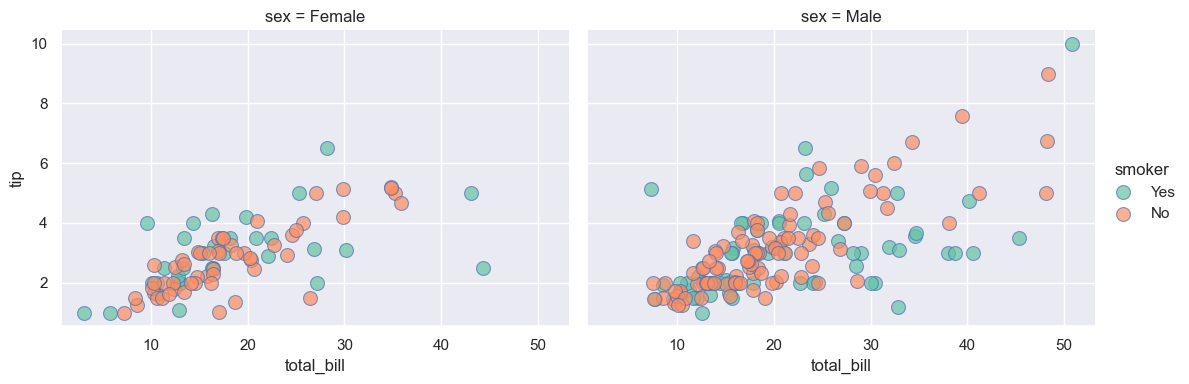

In [71]:
kws = dict(s=100, edgecolor="b", alpha=0.7)

new_fg = sns.FacetGrid(data=tip_df, col="sex", hue="smoker",
                       col_order=['Female', 'Male'],
                       palette="Set2",
                       height=4, aspect=1.4);
new_fg.map(sns.scatterplot, 'total_bill','tip', **kws);
new_fg.add_legend();